Quick Version of Forecast Evaluator - uses Player ID for player identification

In [114]:
# import necessary libraries for use throughout

import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import math

LOAD PREDICTION FILES

In [117]:
def loadpredictions(file):
    
    
    #filename = '%s_forwards_points_forecast_ML_20170919.csv' % (season)
    results = np.array(pd.read_csv(file,header=None))
    
    return results

# outputs two column numpy array
# column 1 - Player ID
# column 2 - Predicted Points

LOAD ACTUAL RESULTS

In [118]:
def loadstats():
    
    #position will be a string defining which positional stats we want to bring in, skater or goalie
    
    filename = 'NHL_skater_2005-2017.csv'
    results = np.array(pd.read_csv(filename,header=None))
    
    return results

# outputs numpy array of all player stats from 2005/06 season to 2016/17 season
# important columns
# column 0 - Player ID
# column 14 - points
# column 18 - Season ID

COMAPRE DATASETS

In [119]:
def compare (season,predicted,predindex,actual,actindex,intype):
    
    # prediction index says which column to use from the predicted file
    # 0 - Player ID
    # 1 - Predicted Points
    
    # actindex says which column to use from the predicted file
    # 0 - Player ID
    # 1 - Actual Points
    # 2 - Season ID
    
    results = [['PlayerID','PredictedPoints','ActualPoints','Error']]
    
    for i in range(0,len(predicted)):
        
        if intype == 'Mag':
            PlayerID = predicted[i,predindex[0]]
            PredictedPoints = predicted[i,predindex[1]]


            for j in range(1,len(actual)):

                if ((int(actual[j,actindex[2]])==season) and (PlayerID == actual[j,actindex[0]])):

                    Error = int(PredictedPoints) - int(actual[j,actindex[1]])
                    results.append([PlayerID,PredictedPoints,int(actual[j,actindex[1]]),Error])
                    
        elif intype == 'ML':
            PlayerID = predicted[i,predindex[0]]
            PredictedPoints = predicted[i,predindex[1]]


            for j in range(1,len(actual)):

                if ((int(actual[j,actindex[2]])==season) and (PlayerID == int(actual[j,actindex[0]]))):
                    
                    Error = PredictedPoints - int(actual[j,actindex[1]])
                    results.append([PlayerID,PredictedPoints,int(actual[j,actindex[1]]),Error])
                    
        else:
            pass
                
    return results

PLOT DATA RESULTS

In [121]:
def scatterresults (data, season):

    # data is an array of the information we want to plot
    # data should be input in the following format
    # row 1 is expected to be a header row
    # all subsequent rows should contain data
    # column 0 - PlayerID
    # column 1 - Predicted Results
    # column 2 - Actual Results
    # column 3 - Error
    
    # create ID's for columns so I don't have to rewrite this all the time
    PlayerIDColumn = 0
    PredictedColumn = 1
    ActualColumn = 2
    ErrorColumn = 3
    
    
    
    # plot actual results versus the error

    fig1 = plt.figure(figsize=(16,5))
    ax = fig1.add_subplot(1,3,1)
    ax.scatter(data[1:,ActualColumn],data[1:,ErrorColumn])
    plt.xlabel('Actual Results')
    plt.ylabel('Error')
    plt.title('Actual vs. Error', fontsize=16)
    plt.grid(True)



    # plot predicted results versus the error


    ay = fig1.add_subplot(1,3,2)
    ay.scatter(data[1:,PredictedColumn],data[1:,ErrorColumn])
    plt.xlabel('Predicted Results')
    plt.ylabel('Error')
    plt.title('Predicted vs. Error', fontsize=16)
    plt.grid(True)



    # plot actual versus predicted

    az = fig1.add_subplot(1,3,3)
    az.scatter(data[1:,ActualColumn],data[1:,PredictedColumn])
    az.plot([0,50,120],[0,50,120])
    plt.ylim(20,120)
    plt.xlabel('Actual Results')
    plt.ylabel('Predicted Results')
    plt.title('Actual vs. Predicted', fontsize=16)
    plt.grid(True)

    fig1.suptitle(str(season), fontsize=36)
    fig1.subplots_adjust(top=0.82,wspace=0.3)
    plt.show()
    
    return

SOME EXTRA STUFF

In [125]:
def rootmeansquare(data):
    
    Errindex = 3
    sumsquare = 0
    count = 0
    
    for i in range(1,len(data)):
        
        sumsquare += int(data[i,Errindex])*int(data[i,Errindex])
        count += 1
    
    result = round(math.sqrt(sumsquare/count),2)
    
    return result
        

# gonna need this for a later function

# define a function to decide which group we are working in
# as it currently stands, another function 'groups' will exclusively be using this function
    
def pickgroup(score,limits):
    
    # score is the point total we are looking to sort into a particular group
    # note: as it currently stands, while score is a numerical value, it is actually stored as a string
    # so we need to convert score into an integer for sorting purposes
    
    # limits is a list of all the cutoff points for each grouping (this list is generated in the 'groups' function)
    # note: if we have 'n' cutoff points, then we have 'n+1' groups
    # the 'limits' list should already be sorted from lowest to highest
    
    # first let's check the case that the score is above all of the established cutoffs
    
    if int(score) >= limits[len(limits)-1]:
        index = len(limits)
        return index
    else:
        
        # now let's iterate through the cutoffs starting with the lowest one and working our way up
        # if the score is below the current cutoff being compared, then we have found the group
        # and we return the index value
        
        for i in range(0,len(limits)):
            if int(score) < limits[i]:
                index = i
                return index
    return

# gonna need these for a later function as well
# define two functions to determine the lowest and highest values

def lowest(test,current):
    
    if test < current:
        return test
    else:
        return current

def highest(test,current):
    
    if test > current:
        return test
    else:
        return current


def groups (data,sourcetype):
    
    #data is an array of the results that we would like to group
    #sourcetype will determine whether we are grouping actual results or predicted results
    
    #define an index based on the type of results we are grouping so that we can appropriately index
    #the input data for the correct information
    if sourcetype == 'predicted':
        typeindex = 0
    elif sourcetype == 'actual':
        typeindex = 1
    
    # define the upper and lower limits of the groupings we will use for separating data
    # i've done it this way for simpler changes to the groupings at a later date
    # possibly even prompting the user for feedback to determine what they want real time
    lowlim = 30
    upplim = 90
    step = 10
    loopcount = math.ceil((upplim-lowlim)/step)
    count = 0
    grouplimits = []
    
    while (count <= loopcount):     
        if upplim < (lowlim + count*step):
            grouplimits.append(upplim)
        else:
            grouplimits.append(lowlim + count*step) 
        count += 1
    
    # print (grouplimits) # QC check
    
    
    # create the header row for our function results based on our limits defined above
    resultshead = []
    
    for i in range(0,len(grouplimits)):
        if i == 0:
            resultshead.append('<' + str(grouplimits[i]))      
        else:  
            resultshead.append(str(grouplimits[i-1]) + '-' + str(grouplimits[i]-1))
    
    resultshead.append(str(grouplimits[len(grouplimits)-1]) + '+')
    
    # print(resultshead) # QC check

    
    # We want our final results table to be like this
    # row 1 (0) - header row (already initialized above)
    # row 2 (1) - # of players (count of the number of players in the group)
    # row 3 (2) - cumulative error (sum of the error of all players in the group)
    # row 4 (3) - average error (average error per player in the group)
    # row 5 (4) - min error value (largest underestimate of actual production)
    # row 6 (5) - max error value (largest overestimate of actual production)
    # row 7 (6) - cumulative absolute value error (sum of the error of all players in the group)
    # row 8 (7) - average abs value error
    # row 9 (8) - max error absolute value
    # row 10 (9) - RMS error
    # each column will be a different points grouping (as defined above)
    
    
    #initialize results table
    results = []
    
    # insert the header row into the final table
    results.append(resultshead)
    
    # create the shape of the rest of the rows and intialize all values to zero
    for i in range(0,9):
        temp = []
        for j in range(0,len(resultshead)):
            temp.append(0)
        results.append(temp)  
    
    # print (np.asarray(results) # QC check
    
    # now let's sort the Error data into the results table   
    
    # we want to iterate through each player
    
    for i in range(1,len(data)):
       
        # note we start at 1 because the first row (0) in the input 'data' is a header row.
        
        # use a function 'pickgroup' (see below) to identify which column we are working in
        colindex = pickgroup(data[i,1+typeindex],grouplimits)
        
        # now that we know which column we are working in, let's update the results table
        
        # increment the number of players
        results[1][colindex] += 1
        
        # add the cumulative sum of the error
        results[2][colindex] += int(data[i,3])
        
        # update min error (if applicable) - its a simple task that probably doesn't need a funciton but let's use one
        results[4][colindex] = min(int(data[i,3]),results[4][colindex])
        
        # update max error (if applicable) - again simple, probably don't need a function, but let's do it again
        results[5][colindex] = max(int(data[i,3]),results[5][colindex])
        
        # add cumulative sum of the absolute value of error
        results[6][colindex] += abs(int(data[i,3]))
        
        # find the max error (absolute value)
        results[8][colindex] = max(abs(int(data[i,3])),results[8][colindex])
        
        # find the RMS, let's just go with the sum of squares for now
        results[9][colindex] += int(data[i,3])*int(data[i,3])
        
        # oops, we forgot the 'average' rows
        # we could keep a running average but really there isn't much value in that
        # so let's just compute it after we have summed and counted all of the players
 
    # like now, let's compute the averages, create a loop to go across all columns of the results table
    
    for i in range(0,len(results[0])):
        
        # let's avoid running into a divide by zero scenario
        # just in case we don't have any players in that particular grouping
        if results[1][i] == 0:
            results[3][i] = 0
            results[7][i] = 0
            results[9][i]= 0
        else:
            results[3][i] = round(results[2][i] / results[1][i],2)
            results[7][i] = round(results[6][i] / results[1][i],2)
            results[9][i] = round(math.sqrt(results[9][i] / results[1][i]),2)
                       

    return results

In [123]:
def groupplots (data,season,type):
    
    # data is an array of the information we want to plot
    # data should be input in the following format
    # row 1 (0) - header row (already initialized above)
    # row 2 (1) - # of players (count of the number of players in the group)
    # row 3 (2) - cumulative error (sum of the error of all players in the group)
    # row 4 (3) - average error (average error per player in the group)
    # row 5 (4) - min error value (largest underestimate of actual production)
    # row 6 (5) - max error value (largest overestimate of actual production)
    # row 7 (6) - cumulative absolute value error (sum of the error of all players in the group)
    # row 8 (7) - average abs value error
    # row 9 (8) - max error abs value
    # row 10 (9) - RMS error
    # each column is a different scoring group
    
     # season is an integer marking the starting year of the season we are evaluating
    # example: if season = 2011, we are looking at the 2011-2012 season
    
    # plot actual results versus the error
    
    N = len(data[1]) # the number of locations for the groups
    ind = np.arange(N) # the x locations for the groups
    width = 0.35 # width of the bars
    
    xticks = [' '] # labels for the ticks on the x-axis bar graph
    for i in range(0,len(data[0])):
        xticks.append(data[0,i])

    
    fig1 = plt.figure(figsize=(16,12))
    
    # let's plot the cumulative error first
    ax1 = fig1.add_subplot(2,2,1)
    ax1.bar(ind, data[2,:], width) # cumulative error
    ax1.set_title('Cumulative Predicted Error by Point Groupings', fontsize=12)
    ax1.set_xlabel('Point Groupings')
    ax1.set_xticklabels(xticks)
    ax1.set_ylabel('Cumulative Error')
    ax1.axhline(y=0, linewidth=1, color='k')
    
    
    # now let's plot the average error beside it
    ax2 = fig1.add_subplot(2,2,2)
    ax2.bar(ind, data[3,:], width) # average error
    # ax2.plot(ind,data[5,:], color='r') # max error
    # ax2.plot(ind,data[4,:], color='g') # min error (or technically, max negative error)
    ax2.set_title('Average Predicted Error by Point Groupings', fontsize=12)
    ax2.set_xlabel('Point Groupings')
    ax2.set_xticklabels(xticks)
    ax2.set_ylabel('Average Error')
    ax2.axhline(y=0, linewidth=1, color='k')
   
    
    # let's plot the cumulative error but with absolute values this time
    ay1 = fig1.add_subplot(2,2,3)
    ay1.bar(ind, data[6,:], width) # cumulative error absolute value
    ay1.set_title('Cumulative Predicted Error (absolute value) by Point Groupings', fontsize=12)
    ay1.set_xlabel('Point Groupings')
    ay1.set_xticklabels(xticks)
    ay1.set_ylabel('Cumulative Error (absolute value)')
    
    
    # let's plot the average error but with absolute values
    ay2 = fig1.add_subplot(2,2,4)
    ay2.bar(ind, data[9,:], width) # average error absolute value
    # ay2.plot(ind,data[8,:], color='r') # max error absolute value
    ay2.set_title('RMSE by Predicted Point Groupings', fontsize=12)
    ay2.set_xlabel('Predicted Point Groupings')
    ay2.set_xticklabels(xticks, rotation=45)
    ay2.set_ylabel('Average Error (absolute value)')
    
    
    fig1.suptitle(str(season) + " - " + type, fontsize=36)
    fig1.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()
    
    return

In [126]:
def lastlook(season,data,groups,RMSE,name):
    
    # let's make some indexs about the important stuff for this function so that we can
    # edit quickly in case formatting of input data changes in the future
    
    # data will contain prediction values, actual values, error
    Predindex = 1
    Actualindex = 2 
    Errindex = 3
    
    # groups will contain 
    Groupheadindex = 0
    AvgErrindex = 3
    RMSErrindex = 9
    
    # setup stuff for bar graphs
    
    N = len(groups[1]) # the number of locations for the groups
    ind = np.arange(N) # the x locations for the groups
    width = 0.2 # width of the bars
    
    xticks = [' '] # labels for the ticks on the x-axis bar graph
    for i in range(0,len(groups[Groupheadindex])):
        xticks.append(groups[Groupheadindex,i])
    
    # Let's start plotting
    
    fig1 = plt.figure(figsize=(16,5))
    
    # plot Actual Results versus Predicted Results
    # see how close we are the the 1:1 line

    ax = fig1.add_subplot(1,3,1)
    ax.scatter(data[1:,Actualindex],data[1:,Predindex])  # scatter of all of the data
    ax.plot([0,50,120],[0,50,120])  # the magical 1:1 line
    plt.xlabel('Actual Results')
    plt.ylabel('Predicted Results')
    plt.title('Actual vs. Predicted', fontsize=16)
    plt.grid(True)
    
    # plot RMSE versus Predicted point groupings
    # gives an idea of the amount of error at different point levels
    
    ay = fig1.add_subplot(1,3,2)
    ay.bar(ind, groups[RMSErrindex,:],width)
    ay.set_title('RMSE by Predicted Point Groupings', fontsize=12)
    ay.set_xlabel('Predicted Point Groupings')
    ay.set_xticklabels(xticks, rotation=45)
    ay.set_ylabel('RMS Error')
    
    
    # plot Avg Error versus Predicted point groupings
    # doesn't really mean alot on its own but...
    # in conjunction with RMSE, can guess whether the prediction set tends to be...
    # conservative, predicts lower than actual
    # optimistic, predicts higher than actual
    
    az = fig1.add_subplot(1,3,3)
    az.bar(ind, groups[AvgErrindex,:],width)
    az.set_title('Average Error by Predicted Point Groupings', fontsize=12)
    az.set_xlabel('Predicted Point Groupings')
    az.set_xticklabels(xticks,rotation=45)
    az.set_ylabel('Average Error')

    
    # let's give the whole thing a title
    
    fig1.suptitle(name + ' - ' + str(season) + ' - Overall RMSE: ' + str(RMSE),fontsize=36)
    fig1.subplots_adjust(top=0.82,wspace=0.3,hspace=0.3)
    plt.show()
    
    return

PUTTING IT ALL TOGETHER

In [127]:
def doitall(file,season,Actual, ActualIndex, PredictIndex,setname,intype):
    
    Predictions = loadpredictions(file)
    
    CompareStats = np.asarray(compare(season,Predictions,PredictIndex,Actual,ActualIndex,intype))
    
    Predgroups = np.asarray(groups(CompareStats,'predicted'))
    
    RMSE = rootmeansquare(CompareStats)
    
    lastlook(season,CompareStats,Predgroups,RMSE,setname)
    
    print()
    print()
    
    return
    
    

MODIFY BELOW FOR WHATEVER YOU WANT TO COMPARE:

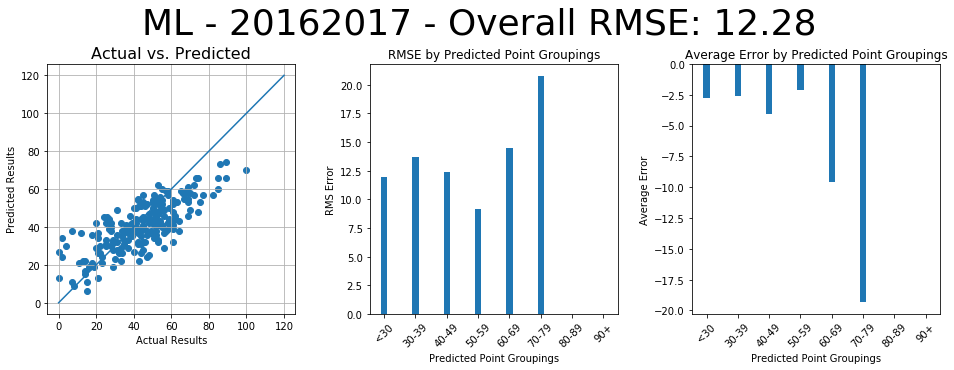

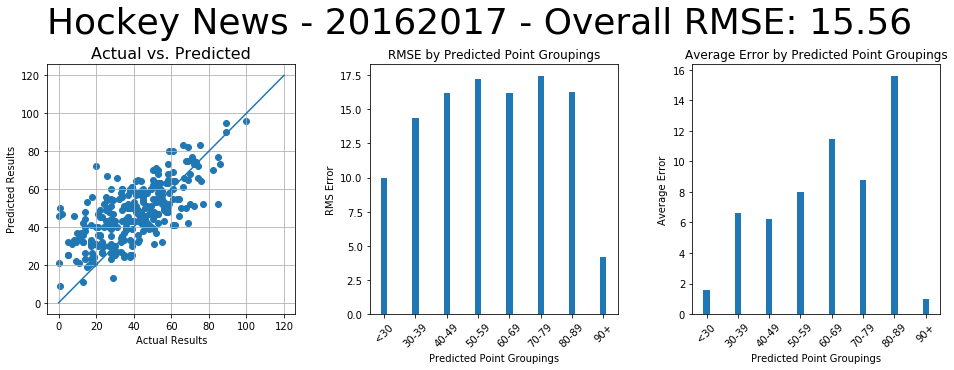

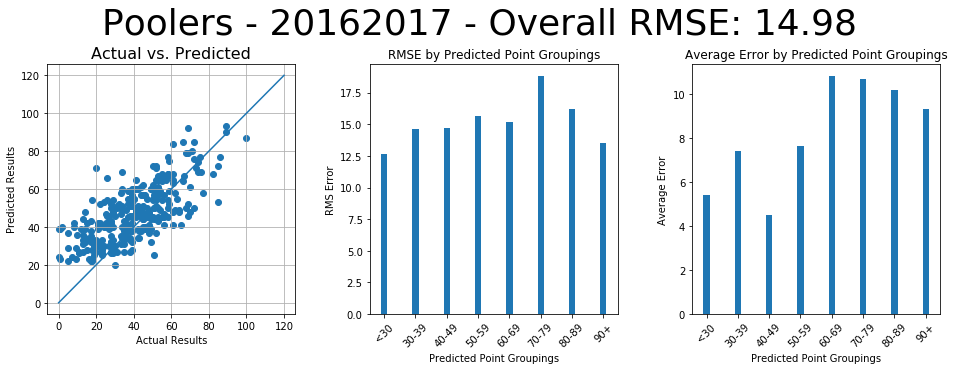

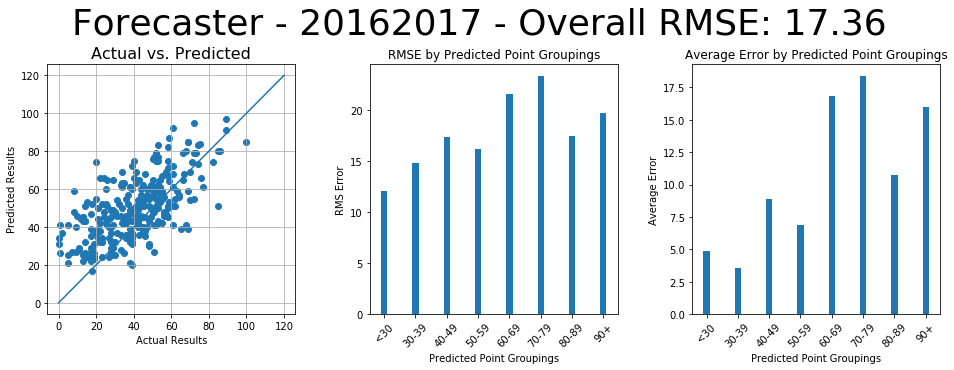

In [128]:
# this can stay the same regardless of the season you are looking at
# as long as it is within the 2005-2006 to 2016-2017 season

Actual = loadstats()

# MODIFY BELOW INDEXES to suit the columns which important data is drawn from

# Player ID column in the actual stats file
ActPlayerID = 0
# Points column in the actual stats file
ActPoints = 14
# Season ID column in the actual stats file
ActSeason = 18

# Player ID column in the Prediction stats file
PredPlayerID = 0
# Points column in the Prediction stats file
PredPoints = 1

IndexActual = [ActPlayerID,ActPoints,ActSeason]
IndexPred = [PredPlayerID,PredPoints]

# Tell me what season you want to look at
# example: for the 2016-2017 season, enter 20162017

season = 20162017
filename = '%s_forwards_points_forecast_ML_20170919.csv' % (season)

#let's do it all

intype = 'ML'
doitall(filename,season,Actual,IndexActual,IndexPred,'ML',intype)


# do it again for Magazine Predictions

# Hockey News - 2016-17

filename = '2016_Predictions_skater_withPlayerID.csv'
PredPlayerID = 8
PredPoints = 5
IndexPred = [PredPlayerID,PredPoints]
intype = 'Mag'

doitall(filename,season,Actual,IndexActual,IndexPred,'Hockey News',intype)

# Poolers - 2016-17

filename = '2016_Predictions_skater_withPlayerID.csv'
PredPlayerID = 8
PredPoints = 6
IndexPred = [PredPlayerID,PredPoints]
intype = 'Mag'

doitall(filename,season,Actual,IndexActual,IndexPred,'Poolers',intype)


# Forecaster - 2016-17

filename = '2016_Predictions_skater_withPlayerID.csv'
PredPlayerID = 8
PredPoints = 7
IndexPred = [PredPlayerID,PredPoints]
intype = 'Mag'

doitall(filename,season,Actual,IndexActual,IndexPred,'Forecaster',intype)


Chart explanations (what you are looking at above):

1) Actual versus Predicted Results - using the 1:1 (perfect prediction) line, we can see how far above or below reality that the predictions were.  Points below the line are underestimates, points above the line are overestimates.

2) RMSE is broken down by sub-groupings of point ranges to see if there is any bias to these ranges

3) Average Error doesn't mean alot on it's own, however, when used in conjunction with RMSE, it can indicate which direction the error tends to lean (above or below reality)


MY THOUGHTS:

Keep in mind this is only one season comparing all 4 sources, so results may vary


Machine Learning Set

- Best overall RMSE
- seems to be very conservative with predictions relative to the magazines (also seen from the highest predicted point total in the 70's)
- Scatter plot seems to be much more concentrated with less variation outwards compared to the magazines

Magazines

- Forecaster appears to be the most optimistic with predictions while Hockey News and Pooler's seem to be more conservative (but still not as conservative as machine learning)
- Poolers seems to perfrom the best based on RMSE, followed by Hockey News and finally Forecaster
- It is worth noting though that all three magazines performed quite similarily in the 50 and below point ranges.

